In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (1080, 1080, 3)


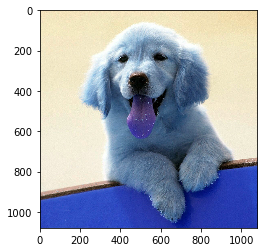

In [121]:
image = cv2.imread('image402.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

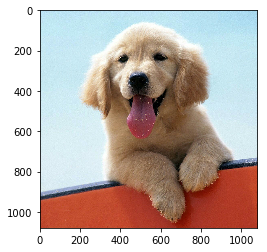

In [122]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

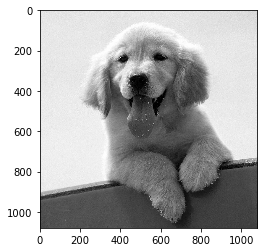

In [123]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

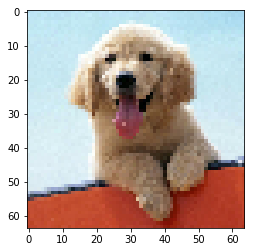

In [124]:
resized_image = cv2.resize(image, (64, 64))
plt.imshow(resized_image)

In [125]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [126]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [127]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    
    return rgb_colors

[array([130.80292271, 131.73589999, 129.84441575]),
 array([247.52499532, 161.95211571,  93.93156712]),
 array([249.84405973, 224.30844456,  68.94793181]),
 array([ 98.66140918, 215.91195863, 243.69166128]),
 array([239.57369086, 240.18915768, 236.4093073 ]),
 array([103.43142587, 173.9231728 , 249.45034939]),
 array([ 47.72245336, 159.54918803, 158.99235002]),
 array([209.34711538,  92.96463675,  41.37307692]),
 array([215.02593098, 196.25316826, 176.15119906]),
 array([56.74079418, 75.90308011, 77.1331786 ]),
 array([132.53880418,  57.61983896,  32.99246188]),
 array([ 60.45802382, 151.31031128, 248.82366466]),
 array([48.48523404, 32.16014941, 29.24991245]),
 array([  8.3906317 , 177.49880003, 192.17399503]),
 array([ 94.59431329, 100.38812653, 101.32904989]),
 array([158.97847879, 162.74123577, 159.46434842])]

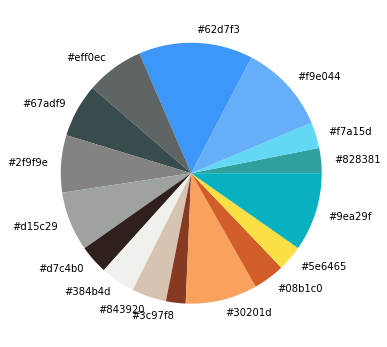

In [130]:
get_colors(get_image('image402.jpg'), 16, True)

In [79]:
ims = ['image'+str(i)+'.jpg' for i in range(1,405)]
images = [get_image(i) for i in ims]

In [80]:
COLORS = {
    'GREEN': [0, 128, 0],
    'BLUE': [0, 0, 128],
    'RED': [255, 0, 0],
    'YELLOW' : [255, 255, 0],
    'GRAY' : [128,128,128],
    'PINK' : [255, 15, 192],
    'PURPLE' : [200,162,200]
}


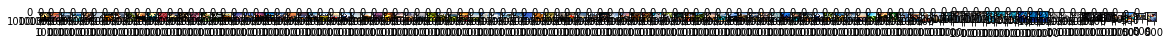

In [30]:
plt.figure(figsize=(20, 10))
for i in range(len(images)):
    plt.subplot(1, len(images), i+1)
    plt.imshow(images[i])

In [53]:
def match_image_by_color(image, color, threshold = 60, number_of_colors = 10): 
    
    image_colors = get_colors(image, number_of_colors, False)
    selected_color = rgb2lab(np.uint8(np.asarray([[color]])))

    select_image = False
    for i in range(number_of_colors):
        curr_color = rgb2lab(np.uint8(np.asarray([[image_colors[i]]])))
        diff = deltaE_cie76(selected_color, curr_color)
        if (diff < threshold):
            select_image = True
    
    return select_image

In [97]:
def show_selected_images(images, color, threshold, colors_to_match):
    index = 1
    
    for i in range(len(images)):
        selected = match_image_by_color(images[i],
                                        color,
                                        threshold,
                                        colors_to_match)
        if (selected):
            plt.subplot(5, 5, index)
            plt.imshow(images[i])
            index += 1

CPU times: user 1min 38s, sys: 32.9 s, total: 2min 11s
Wall time: 1min 25s


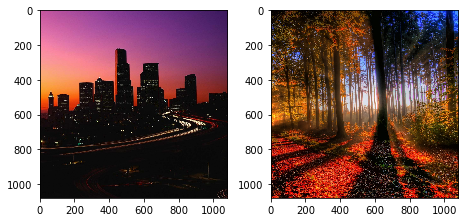

In [103]:
%%time
plt.figure(figsize = (20, 20))
show_selected_images(images[10:80:10], COLORS['RED'], 60, 10)

CPU times: user 2min 35s, sys: 47.9 s, total: 3min 22s
Wall time: 2min 12s


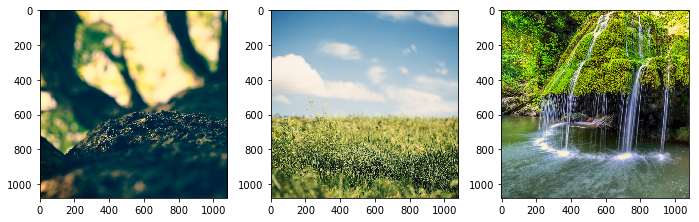

In [106]:
%%time
plt.figure(figsize = (20, 20))
show_selected_images(images[10:120:10], COLORS['GREEN'], 60, 10)

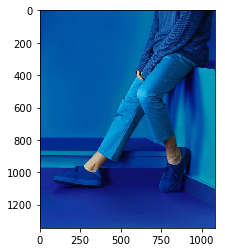

In [117]:
# %%time
# plt.figure(figsize = (20, 20))
# show_selected_images(images[92:93], COLORS['BLUE'], 60, 10)


CPU times: user 4min 30s, sys: 1min 22s, total: 5min 52s
Wall time: 3min 51s


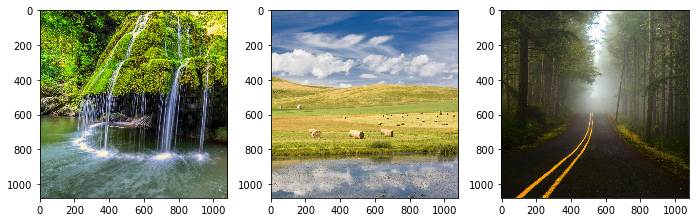

In [109]:
%%time
plt.figure(figsize = (20, 20))
show_selected_images(images[100:200:5], COLORS['YELLOW'], 60, 10)

CPU times: user 34.3 s, sys: 19.4 s, total: 53.7 s
Wall time: 29.2 s


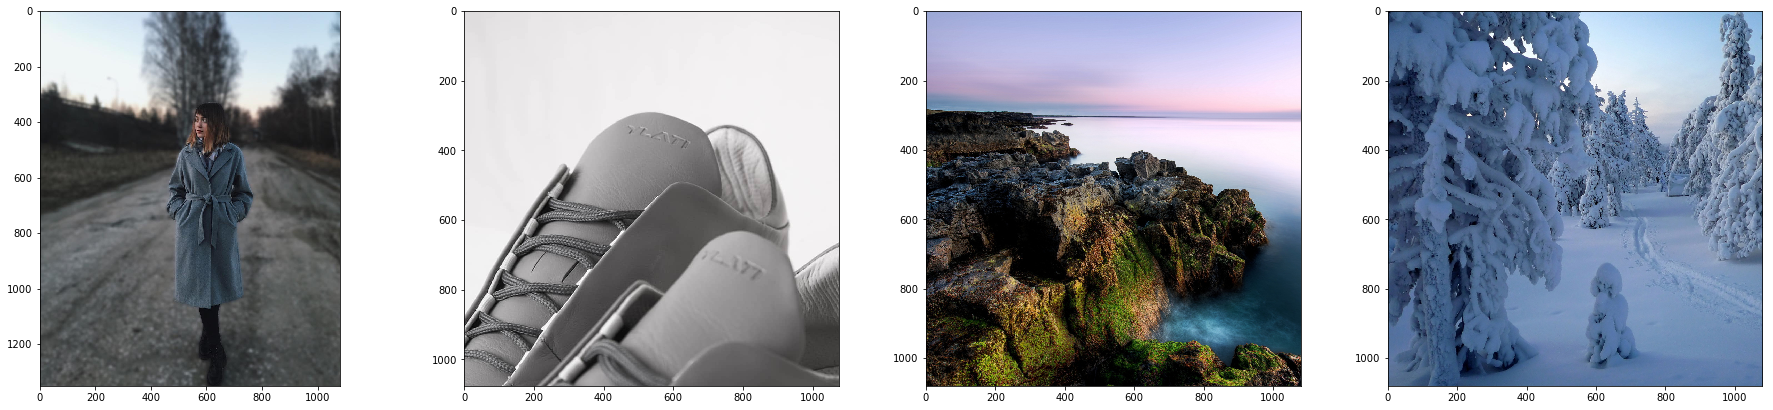

In [100]:
%%time
plt.figure(figsize = (40, 40))
show_selected_images(images[86:120:9], COLORS['GRAY'], 60, 10)

CPU times: user 4min 18s, sys: 1min 19s, total: 5min 38s
Wall time: 3min 39s


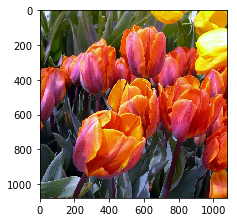

In [118]:
%%time
plt.figure(figsize = (20, 20))
show_selected_images(images[200:300:5], COLORS['PINK'], 60, 10)

CPU times: user 2min 16s, sys: 39.2 s, total: 2min 55s
Wall time: 1min 56s


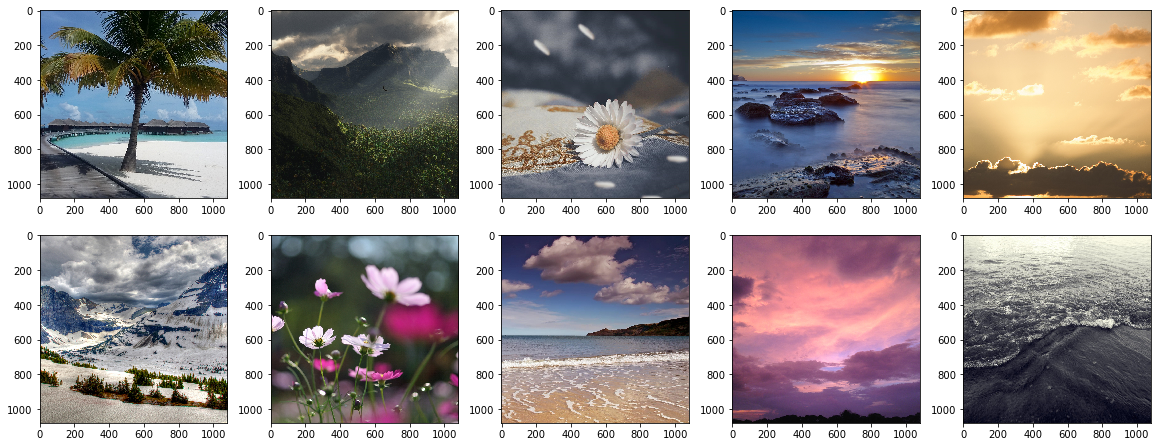

In [120]:
%%time
plt.figure(figsize = (20, 20))
show_selected_images(images[300:400:10], COLORS['PURPLE'], 60, 10)